# Data exploration and cleaning; business questions
1. How should products be classified into different categories to simplify reports and analysis?
2. What is the distribution of product prices across different categories?
3. How many products are being discounted?
4. How big are the offered discounts as a percentage of the product prices?
5. How do seasonality and special dates (Christmas, Black Friday) affect sales?
6. How could data collection be improved?
7. How many orders are there?
8. How many products are there?
9. What period of time do these orders comprise?
10. How many orders are Completed?
11. How should revenue be computed?

In [ ]:
# import modules

# remove FutureWarnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# import pandas
import pandas as pd

# import regex module
import re

# import matplotlib for plotting
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# options
pd.options.display.max_colwidth = 100

In [ ]:
# https://drive.google.com/file/d/1B-lbs0ZU1wXi726nL5vHgpTN3rpWQaWm/view?usp=share_link

url = 'https://drive.google.com/file/d/1B-lbs0ZU1wXi726nL5vHgpTN3rpWQaWm/view?usp=share_link'
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
olcl = pd.read_csv(path)

url = 'https://drive.google.com/file/d/1ocQLaPgSs4EEqGQhs6DtktO5ebgJj199/view?usp=share_link' # brands.csv
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
procl = pd.read_csv(path)

url = 'https://drive.google.com/file/d/1AoGIEsoX0LBWyCBshFhHhmVQCNW7isRE/view?usp=share_link'# orders.csv
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
orders = pd.read_csv(path)

olcl.head(5)

,id,order_id,product_quantity,sku,unit_price,date
0,1121139,241319,1,JBL0123,44.99,2017-01-02 12:26:59
1,1398738,241423,1,LAC0212,129.16,2017-11-06 12:47:20
2,1529178,242832,1,PAR0074,10.77,2017-12-31 17:26:40
3,1181923,243330,1,OWC0074,77.99,2017-02-15 17:07:44
4,1437153,243784,3,PHI0080,51.29,2017-11-24 13:27:41


In [ ]:
orders.head(5)

,order_id,created_date,total_paid,state
0,241319,2017-01-02 13:35:40,44.99,Cancelled
1,241423,2017-11-06 13:10:02,136.15,Completed
2,242832,2017-12-31 17:40:03,15.76,Completed
3,243330,2017-02-16 10:59:38,84.98,Completed
4,243784,2017-11-24 13:35:19,157.86,Cancelled


In [ ]:
procl.head(5)

,sku,name,desc,price,in_stock,type
0,8MO0001-A,"Open - Micro SD Adapter 8Mobility iSlice Macbook Air 13 ""Silver",Micro SD card adapter for MacBook Air 13-inch,35.0,0,1298
1,8MO0003-A,"Open - 8Mobility iSlice Micro SD adapter for Macbook Retina 15 ""Mid 2012 / Early 2013 Silver",Refurbished adapter Micro SD card for MacBook Pro Retina 15-inch Mid 2012 / Early 2013,35.0,0,12585395
2,8MO0007,"8Mobility iSlice Micro SD adapter for Macbook Air 13 ""Silver",Micro SD card adapter for MacBook Air 13-inch,35.0,0,12585395
3,8MO0008,"8Mobility iSlice Micro SD Adapter Macbook Pro Retina 13 ""Silver",Micro SD card adapter for MacBook Pro Retina 13 inches,35.0,0,12585395
4,8MO0009,"8Mobility iSlice Micro SD Adapter for Macbook Pro Retina 15 ""Mid 2012 / Early 2013 Silver",Micro SD card adapter for MacBook Pro Retina 15-inch Mid 2012 / Early 2013,35.0,1,12585395


In [ ]:
unique_order_ids = olcl['order_id'].nunique()
print(unique_order_ids)

199559


In [ ]:
oneolcl= olcl[olcl['sku'] == 'JBL0123']
oneolcl

,id,order_id,product_quantity,sku,unit_price,date
0,1121139,241319,1,JBL0123,44.99,2017-01-02 12:26:59
815,1120206,300082,1,JBL0123,44.99,2017-01-01 23:03:40
1624,1122001,300842,1,JBL0123,44.99,2017-01-02 18:45:15
1726,1122217,300943,1,JBL0123,44.99,2017-01-02 20:11:11
2038,1122865,301251,1,JBL0123,44.99,2017-01-03 01:31:12
...,...,...,...,...,...,...
269502,1626729,517252,1,JBL0123,42.99,2018-02-25 18:38:55
270257,1628280,517952,1,JBL0123,42.99,2018-02-26 21:38:36
271603,1630941,519171,1,JBL0123,42.99,2018-02-28 22:34:22
273048,1633506,520342,1,JBL0123,42.99,2018-03-02 22:05:09


In [ ]:
# group by words in description (regex)
categories = {
    'Repair, Second hand and Services' : [1,999999, r'\bifixit\b|\blike/new\b|\breconditioned\b|\brefurbished\b|\brepair\b|\breplacement\b|\bscrewdriver\b|\bsecond hand\b|\bspatula\b|\bsphygmomanometer\b|\btoolkit\b|\btools\b'],
    'Accessories'                      : [1,2000, r'\badobe\b|\badapter\b|\bbank\b|\bbattery\b|\bbracket\b|\bbutton\b|\bcar\b|\bcharger\b|\bcharging\b|\bclock\b|\bdock\b|\bdvd\b|\bfan\b|\bhub\b|\bmicrosoft\b|\bpower\b|\bremote control\b|\bscale\b|\bsensor\b|\bsoftware\b|\bstand\b|\btablet\b|\bthermo*\b|\busb\b|\bwatch\b|\bweather\b'],
    'Alarms and Security'              : [1,300, r'\balarm\b|\blocator\b|\bradar\b|\bsecurity\b|\bsurveillance\b'],
    'Audio equipment'                  : [1,800, r'\bheadphones\b|\bheadset\b|\bmicrophone\b|\bmusic\b|\bplayer\b|\bspeaker\b'],
    'Lighting'                         : [1,600, r'\bbulb\b|\bhue\b|\blamp\b|\blights\b|\bphilips\b'],
    'Peripherals'                      : [1,10000, r'\bamplifier\b|\bcable\b|\bd-link\b|\bhdmi\b|\bkeyboard\b|\bkeypad\b|\bmonitor\b|\bmouse\b|\bpen\b|\bprinter\b|\brouter\b|\bscanner\b|\bscreen\b|\bstylus\b|\bswitch\b|\b802.11\b'],
    'Storage'                          : [1,13455, r'\bSSD\b|\bTB\b|\bGB\b|\bWD\b|\bwestern digital\b|\bdatatraveler\b|\bddr\b|\bdimm\b|\bexternal disk\b|\bflash drive\b|\bhard drive\b|\bdisk\b|\bthunderbolt\b|\bmemory card\b|\bnas\b|\bpen drive\b|\bpen-drive\b|\bpendrive\b|\bqnap\b|\braid\b|\bram\b|\bsshd\b|\bsynology\b'],
    'Wearables and Toys'               : [1,800, r'\barmband\b|\bbackpack\b|\bbelt\b|\bbracelet\b|\bcontroller\b|\bdrone\b|\bgopro\b|\bpointer\b|\brobot\b|\bsports\b|\bsticker\b|\bstrip\b|\bwork out\b'],
    'Apple accessories'                : [1,407, r'\bcase\b|\bcasing\b|\bcover\b|\bhousing\b|\biphone\b|\bfolio\b|\bpouch\b|\bprotect*\b|\bresistant\b|\bshell\b|\bshield\b|\bsleeve\b|\bsupport\b'],
    'Desktops and Laptops'             : [1,999999, r'\bdesktop\b|\blaptop\b|\bnotebook\b|\bimac\b|\bipad\b|\bmacbook\b|\bpc\b'],
    'iPhone'                           : [408,2000, r'\biphone\b']
}

patterns = dict()
for category, pat_price in categories.items():
    patterns[category] = re.compile(pat_price[2], re.IGNORECASE)


def categorize(desc, price, categories, patterns):
    cat_keys = categories.keys()
    for category in cat_keys:
        min_price = categories[category][0]
        max_price = categories[category][1]
        match     = re.search(patterns[category], desc)
        if match and (price < max_price):
            return category + ' - ' + match.group(0)
    return 'Missing'


procl['category'] = procl.apply(lambda row: categorize(row['desc'], row['price'], categories, patterns), axis=1)

olclwithprice merged with orders to get the baseprice and state of orders

In [ ]:
olclwithprice = pd.merge(olcl, procl[['sku', 'price','category']], how='left', on='sku')
olclwithprice.rename(columns={'price': 'baseprice'}, inplace=True)
olclwithprice = pd.merge(olclwithprice, orders[['order_id', 'state']], how='left', on='order_id')
olclwithprice

,id,order_id,product_quantity,sku,unit_price,date,baseprice,category,state
0,1121139,241319,1,JBL0123,44.99,2017-01-02 12:26:59,49.95,Accessories - battery,Cancelled
1,1398738,241423,1,LAC0212,129.16,2017-11-06 12:47:20,139.99,Accessories - USB,Completed
2,1529178,242832,1,PAR0074,10.77,2017-12-31 17:26:40,17.99,Accessories - battery,Completed
3,1181923,243330,1,OWC0074,77.99,2017-02-15 17:07:44,99.99,Storage - RAM,Completed
4,1437153,243784,3,PHI0080,51.29,2017-11-24 13:27:41,59.95,Apple accessories - iPhone,Cancelled
...,...,...,...,...,...,...,...,...,...
283747,1650198,527397,1,JBL0122,42.99,2018-03-14 13:56:38,49.95,Accessories - battery,Place Order
283748,1650199,527398,1,JBL0122,42.99,2018-03-14 13:57:25,49.95,Accessories - battery,Shopping Basket
283749,1650200,527399,1,PAC0653,141.58,2018-03-14 13:57:34,215.98,"Repair, Second hand and Services - Tools",Shopping Basket
283750,1650201,527400,2,APP0698,9.99,2018-03-14 13:57:41,25.00,Accessories - USB,Shopping Basket


In [ ]:
olclwithprice.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 283752 entries, 0 to 283751
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                283752 non-null  int64  
 1   order_id          283752 non-null  int64  
 2   product_quantity  283752 non-null  int64  
 3   sku               283752 non-null  object 
 4   unit_price        283752 non-null  float64
 5   date              283752 non-null  object 
 6   baseprice         283752 non-null  float64
 7   category          283752 non-null  object 
 8   state             283752 non-null  object 
dtypes: float64(2), int64(3), object(4)
memory usage: 21.6+ MB


In [ ]:
olclwithprice.isna().sum()


id                  0
order_id            0
product_quantity    0
sku                 0
unit_price          0
date                0
baseprice           0
category            0
state               0
dtype: int64

Create sale column

In [ ]:
olclwithprice['sale'] = olclwithprice['baseprice'] - olclwithprice['unit_price']
olclwithprice.head(4)

,id,order_id,product_quantity,sku,unit_price,date,baseprice,category,state,sale
0,1121139,241319,1,JBL0123,44.99,2017-01-02 12:26:59,49.95,Accessories - battery,Cancelled,4.96
1,1398738,241423,1,LAC0212,129.16,2017-11-06 12:47:20,139.99,Accessories - USB,Completed,10.83
2,1529178,242832,1,PAR0074,10.77,2017-12-31 17:26:40,17.99,Accessories - battery,Completed,7.22
3,1181923,243330,1,OWC0074,77.99,2017-02-15 17:07:44,99.99,Storage - RAM,Completed,22.00


In [ ]:
filtered_item = olclwithprice[olclwithprice['sku'] == 'XDO0047']
filtered_item

,id,order_id,product_quantity,sku,unit_price,date,baseprice,category,state,sale
119388,1365515,406387,1,XDO0047,23.39,2017-09-29 17:09:32,32.99,Missing,Shopping Basket,9.60
129236,1383903,415390,1,XDO0047,25.99,2017-10-21 01:03:55,32.99,Missing,Completed,7.00
129771,1384827,415827,1,XDO0047,25.99,2017-10-22 18:16:59,32.99,Missing,Shopping Basket,7.00
131455,1388160,417320,1,XDO0047,25.99,2017-10-25 13:36:49,32.99,Missing,Completed,7.00
132220,1389335,418038,1,XDO0047,25.99,2017-10-26 12:40:41,32.99,Missing,Shopping Basket,7.00
132653,1390163,418446,1,XDO0047,25.99,2017-10-27 08:49:01,32.99,Missing,Completed,7.00
138231,1401174,423284,1,XDO0047,22.09,2017-11-09 10:44:37,32.99,Missing,Place Order,10.90
138946,1401567,423903,1,XDO0047,25.99,2017-11-09 17:53:32,32.99,Missing,Shopping Basket,7.00
139978,1404047,424898,1,XDO0047,25.99,2017-11-11 10:22:19,32.99,Missing,Pending,7.00
140788,1406425,425651,1,XDO0047,25.99,2017-11-13 11:25:32,32.99,Missing,Completed,7.00


In [ ]:
# Define the function to get the broad category
def getCategory(category):
    if category.startswith('Accessories'):
        return 'Accessories'
    elif category.startswith('Alarms and Security'):
        return 'Alarms and Security'
    elif category.startswith('Apple accessories'):
        return 'Apple accessories'
    elif category.startswith('Audio equipment'):
        return 'Audio equipment'
    elif category.startswith('Desktops and Laptops'):
        return 'Desktops and Laptops'
    elif category.startswith('Lighting'):
        return 'Lighting'
    elif category.startswith('Peripherals'):
        return 'Peripherals'
    elif category.startswith('Repair'):
        return 'Repair'
    elif category.startswith('Storage'):
        return 'Storage'
    elif category.startswith('Wearables'):
        return 'Wearables'
    elif category.startswith('iPhone'):
        return 'iPhone'
    else:
        return None  # Return None if no match is found

# Apply the function to create a new column with the broad category
olclwithprice['broad_category'] = olclwithprice['category'].apply(getCategory)

# Print the result
print(olclwithprice)

             id  order_id  product_quantity      sku  unit_price  \
0       1121139    241319                 1  JBL0123       44.99   
1       1398738    241423                 1  LAC0212      129.16   
2       1529178    242832                 1  PAR0074       10.77   
3       1181923    243330                 1  OWC0074       77.99   
4       1437153    243784                 3  PHI0080       51.29   
...         ...       ...               ...      ...         ...   
283747  1650198    527397                 1  JBL0122       42.99   
283748  1650199    527398                 1  JBL0122       42.99   
283749  1650200    527399                 1  PAC0653      141.58   
283750  1650201    527400                 2  APP0698        9.99   
283751  1650203    527401                 1  APP0927       13.99   

                       date  baseprice  \
0       2017-01-02 12:26:59      49.95   
1       2017-11-06 12:47:20     139.99   
2       2017-12-31 17:26:40      17.99   
3       2017-02

In [ ]:
olclwithprice.shape[0]

283752

In [ ]:
unique_val = olclwithprice['broad_category'].unique()
unique_val

array(['Accessories', 'Storage', 'Apple accessories', None, 'Repair',
       'Peripherals', 'Audio equipment', 'Desktops and Laptops', 'iPhone',
       'Lighting', 'Wearables', 'Alarms and Security'], dtype=object)


Get the date in a column for each month. 


In [ ]:
olclwithprice['date'] = pd.to_datetime(olclwithprice['date'])
olclwithprice['year'] = olclwithprice['date'].dt.year
olclwithprice['month'] = olclwithprice['date'].dt.month
olclwithprice['year_month'] = pd.to_datetime(olclwithprice[['year', 'month']].assign(Day=1)).dt.strftime('%Y-%m')
olclwithprice = olclwithprice.sort_values(by='year_month')
olclwithprice


,id,order_id,product_quantity,sku,unit_price,date,baseprice,category,state,sale,broad_category,year,month,year_month
0,1121139,241319,1,JBL0123,44.99,2017-01-02 12:26:59,49.95,Accessories - battery,Cancelled,4.96,Accessories,2017,1,2017-01
13829,1152889,312273,1,OWC0074,74.99,2017-01-19 23:25:09,99.99,Storage - RAM,Completed,25.00,Storage,2017,1,2017-01
13828,1153346,312272,1,OWC0151,562.99,2017-01-20 11:33:43,640.99,Peripherals - Cable,Place Order,78.00,Peripherals,2017,1,2017-01
13827,1152888,312272,1,PAC1067,3522.99,2017-01-19 23:22:28,4189.00,Storage - RAM,Place Order,666.01,Storage,2017,1,2017-01
13826,1153345,312272,1,OWC0150,294.99,2017-01-20 11:33:27,294.99,Peripherals - Cable,Place Order,0.00,Peripherals,2017,1,2017-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275575,1637484,522011,1,AP20321,519.01,2018-03-06 01:38:53,639.00,"Repair, Second hand and Services - reconditioned",Shopping Basket,119.99,Repair,2018,3,2018-03
275576,1637479,522012,1,SYN0138,136.99,2018-03-06 01:35:30,136.99,Peripherals - Router,Place Order,0.00,Peripherals,2018,3,2018-03
275577,1637488,522014,1,APP2506,362.00,2018-03-06 01:42:39,369.00,Accessories - Watch,Shopping Basket,7.00,Accessories,2018,3,2018-03
275568,1637487,522002,1,SAN0132,31.00,2018-03-06 01:42:14,34.99,Apple accessories - iPhone,Completed,3.99,Apple accessories,2018,3,2018-03


grouped4 dataframe contains the skus, month, state, and broad category

In [ ]:
grouped4 = (olclwithprice
           .groupby(['sku','unit_price','state','broad_category','year_month'])
           .agg({'product_quantity':'sum','baseprice':'first' })
           .rename(columns={'product_quantity': 'sold'})
           .reset_index()
           .sort_values(('sold'),ascending=False)
          )

grouped4['value'] = grouped4['unit_price'] * grouped4['sold']
grouped4['sale'] = grouped4['baseprice'] - grouped4['unit_price']
grouped4['sale%'] = round(grouped4['baseprice'] / grouped4['unit_price'] *10,1)
grouped4['theoreticalvalue'] = round(grouped4['baseprice'] * grouped4['sold'] )
grouped4

,sku,unit_price,state,broad_category,year_month,sold,baseprice,value,sale,sale%,theoreticalvalue
55504,MIC0036,64.99,Shopping Basket,Desktops and Laptops,2018-01,2672,69.90,173653.28,4.91,10.8,186773.0
4489,APP0662,138.00,Shopping Basket,Desktops and Laptops,2018-01,1780,179.00,245640.00,41.00,13.0,318620.0
55525,MIC0036,69.99,Shopping Basket,Desktops and Laptops,2017-12,1597,69.90,111774.03,-0.09,10.0,111630.0
55806,MMW0016,22.99,Shopping Basket,Desktops and Laptops,2018-03,848,29.99,19495.52,7.00,13.0,25432.0
46740,KIN0137,7.49,Place Order,Storage,2017-04,801,8.99,5999.49,1.50,12.0,7201.0
...,...,...,...,...,...,...,...,...,...,...,...
60554,NTE0058,12.99,Completed,Apple accessories,2017-12,1,60.99,12.99,48.00,47.0,61.0
25605,APP2552,43.00,Place Order,Apple accessories,2018-03,1,45.00,43.00,2.00,10.5,45.0
25604,APP2552,43.00,Place Order,Apple accessories,2018-02,1,45.00,43.00,2.00,10.5,45.0
60557,NTE0058,12.99,Pending,Apple accessories,2017-11,1,60.99,12.99,48.00,47.0,61.0


In [ ]:
pivot = pd.pivot_table(grouped4, values='value', index='broad_category', columns='state', aggfunc='sum')
pivot

state,Cancelled,Completed,Pending,Place Order,Shopping Basket
broad_category,,,,,
Accessories,374962.45,2292679.81,625984.79,1367493.45,4482275.17
Alarms and Security,3982.14,28615.81,8807.15,14636.00,78848.37
Apple accessories,44640.97,365314.20,97138.52,213000.82,784008.09
Audio equipment,38735.76,243534.90,60751.46,124478.30,490383.92
Desktops and Laptops,356287.38,865032.71,223925.11,1103427.17,6782000.32
Lighting,1707.64,21206.78,8944.81,13493.02,49828.76
Peripherals,426740.94,1469583.88,429620.85,1437229.62,4950396.65
Repair,226785.67,849674.56,277876.41,173153.24,2400700.53
Storage,2823041.58,7546890.14,2442239.15,9066037.83,51905606.73


In [ ]:
pivot = pd.pivot_table(grouped4, values='value', columns='state', aggfunc='sum')
pivot

state,Cancelled,Completed,Pending,Place Order,Shopping Basket
value,5096521.4,14902141.73,4463866.73,16280953.32,77690301.24


<Axes: >

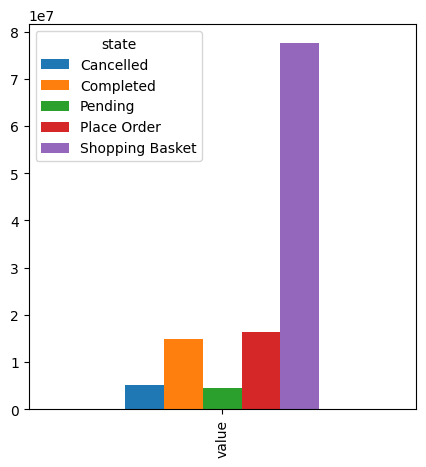

In [ ]:
pivot.plot(kind='bar', figsize=(5, 5))


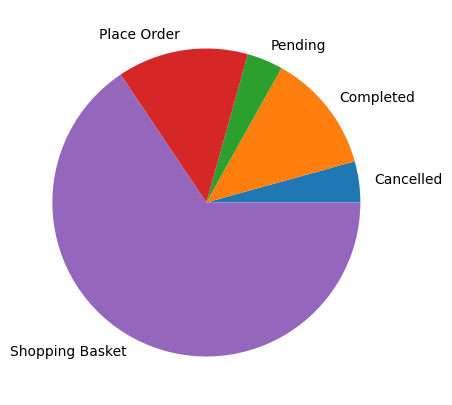

In [ ]:
pivot = pd.pivot_table(grouped4, values='value', columns='state', aggfunc='sum')
pivot = pivot.sum(axis=0)
pivot.plot.pie(figsize=(5, 5))
plt.show()

completed dataframe holds all the items actually ordered. 


In [ ]:
#work only on completed orders
completed = grouped4[grouped4['state']=='Completed']

In [ ]:
completed.shape[0]


26536

In [ ]:
completed.head(5)

,sku,unit_price,state,broad_category,year_month,sold,baseprice,value,sale,sale%,theoreticalvalue
8101,APP1190,51.00,Completed,Apple accessories,2017-11,303,70.00,15453.00,19.00,13.7,21210.0
4965,APP0698,9.99,Completed,Accessories,2017-01,201,25.00,2007.99,15.01,25.0,5025.0
103656,ZAG0032,29.99,Completed,Peripherals,2018-01,171,99.99,5128.29,70.00,33.3,17098.0
55065,MAC0144,24.99,Completed,Accessories,2018-03,168,39.95,4198.32,14.96,16.0,6712.0
76199,PAC2477,19.99,Completed,Audio equipment,2017-12,160,59.98,3198.40,39.99,30.0,9597.0


In [65]:
base = (completed
           .groupby(['broad_category'])
           .agg({'value':'sum1000','theoreticalvalue':'sum'  })
           .reset_index()
           .sort_values(('value'),ascending=False)
          )

base

AttributeError: ignored

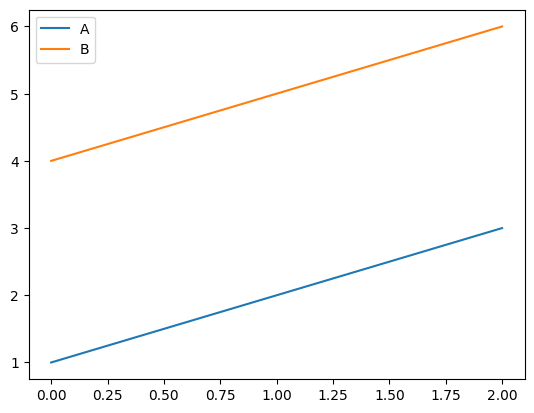

In [52]:
import pandas as pd
import matplotlib.pyplot as plt

# create a sample dataframe
df = pd.DataFrame({'A': [1, 2, 3], 'B': [4, 5, 6]})

# select only two columns
df_two_cols = df[['A', 'B']]

# plot the two columns
df_two_cols.plot(kind='line')

# show the plot
plt.show()

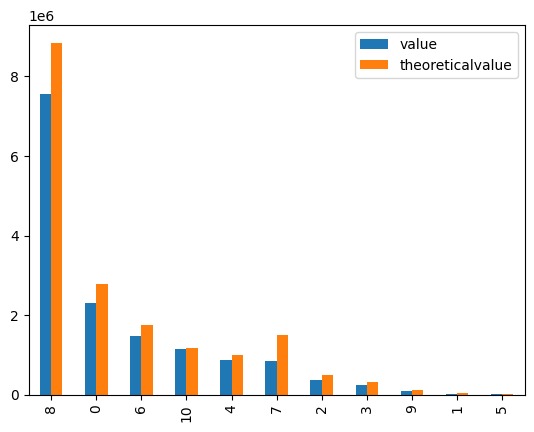

In [62]:
import matplotlib.pyplot as plt
import numpy as np

# select only two columns
df_two_cols = base[['value', 'theoreticalvalue']]

# plot the two columns
df_two_cols.plot(kind='bar')

 
# show the plot
plt.show()



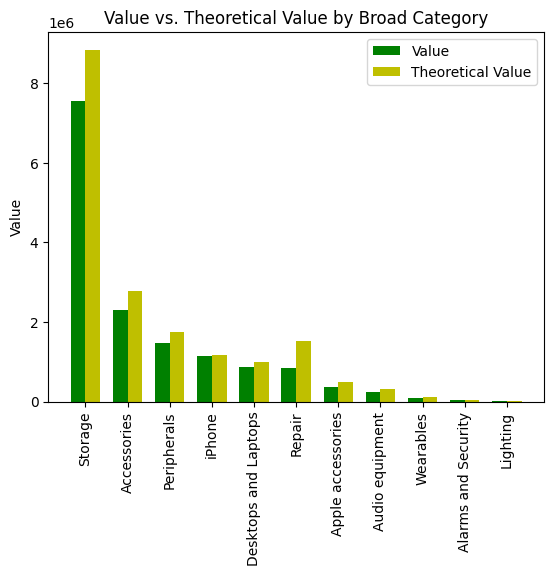

In [66]:
import matplotlib.pyplot as plt
import numpy as np

# select only two columns and set the index to 'broad_category'
df_two_cols = base[['value', 'theoreticalvalue']].set_index(base['broad_category'])

# create a new figure and axis object
fig, ax = plt.subplots()

# get the number of categories
n_cats = len(df_two_cols.index)

# set the bar width and x positions
bar_width = 0.35
x_pos = np.arange(n_cats)

# create the two bar plots side-by-side
value_bars = ax.bar(x_pos, df_two_cols['value'], width=bar_width, color='g', align='center')
theoreticalvalue_bars = ax.bar(x_pos + bar_width, df_two_cols['theoreticalvalue'], width=bar_width, color='y', align='center')

# set the tick positions and labels
ax.set_xticks(x_pos + bar_width/2)
ax.set_xticklabels(df_two_cols.index, rotation=90)

# set the axis labels and title
ax.set_ylabel('Value')
ax.set_title('Value vs. Theoretical Value by Broad Category')

# add a legend
ax.legend((value_bars, theoreticalvalue_bars), ('Value', 'Theoretical Value'))

# show the plot
plt.show()


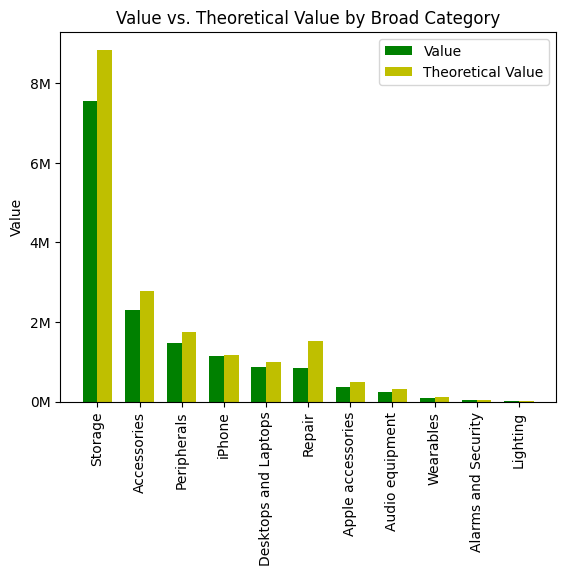

In [67]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np

# select only two columns and set the index to 'broad_category'
df_two_cols = base[['value', 'theoreticalvalue']].set_index(base['broad_category'])

# create a new figure and axis object
fig, ax = plt.subplots()

# get the number of categories
n_cats = len(df_two_cols.index)

# set the bar width and x positions
bar_width = 0.35
x_pos = np.arange(n_cats)

# create the two bar plots side-by-side
value_bars = ax.bar(x_pos, df_two_cols['value'], width=bar_width, color='g', align='center')
theoreticalvalue_bars = ax.bar(x_pos + bar_width, df_two_cols['theoreticalvalue'], width=bar_width, color='y', align='center')

# set the tick positions and labels
ax.set_xticks(x_pos + bar_width/2)
ax.set_xticklabels(df_two_cols.index, rotation=90)

# format the y-axis labels to display values in millions
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{x/1e6:.0f}M'))

# set the axis labels and title
ax.set_ylabel('Value')
ax.set_title('Value vs. Theoretical Value by Broad Category')

# add a legend
ax.legend((value_bars, theoreticalvalue_bars), ('Value', 'Theoretical Value'))

# show the plot
plt.show()


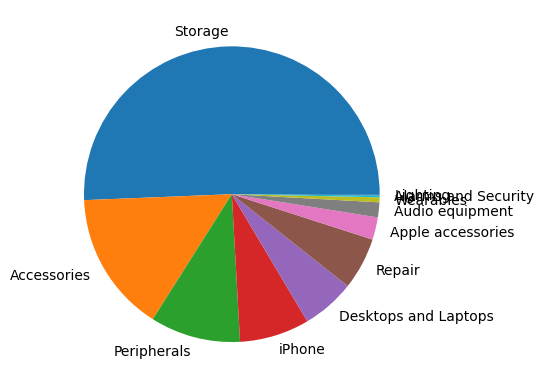

In [ ]:
plt.pie(base['value'], labels=base['broad_category'])
plt.show()

In [ ]:
completed = completed.groupby(['broad_category', 'year_month']).agg({'value': 'sum', 'sold': 'sum', 'theoreticalvalue': 'sum'}).reset_index()
completed['discount'] = round((completed['theoreticalvalue'] / completed['value'] *10),1)
completed

,broad_category,year_month,value,sold,theoreticalvalue,discount
0,Accessories,2017-01,205078.21,2842,256303.0,12.5
1,Accessories,2017-02,89654.42,1033,104932.0,11.7
2,Accessories,2017-03,8813.55,95,9856.0,11.2
3,Accessories,2017-04,78732.79,812,92204.0,11.7
4,Accessories,2017-05,110586.35,1024,127523.0,11.5
...,...,...,...,...,...,...
160,iPhone,2017-11,227113.18,291,236814.0,10.4
161,iPhone,2017-12,242720.77,304,252936.0,10.4
162,iPhone,2018-01,176383.94,213,183153.0,10.4
163,iPhone,2018-02,66415.56,81,70363.0,10.6


In [70]:
# categories = ['Desktops and Laptops', 'Apple accessories', 'Storage', 'Accessories', 'Audio equipment', 'iPhone', 'Wearables', 'Peripherals', 'Repair', 'Alarms and Security', 'Lighting']

# for category in categories:
#     category_grouped = completed[completed["broad_category"] == category]

#     fig, ax = plt.subplots()

#     ax.bar(category_grouped["year_month"], category_grouped["value"], color="blue")
#     ax.set_ylabel("Value")

#     ax2 = ax.twinx()
#     ax2.plot(category_grouped["year_month"], category_grouped["discount"], color="red")
#     ax2.set_ylabel("Discount")

#     # plt.xticks(rotation=90)
#     ax2.set_ylim(9,20)
#     # # Set the x-axis tick label rotation and spacing
#     ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

#     plt.title(category)
#     plt.show()

<ipython-input-99-a884c82ec8e0>:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


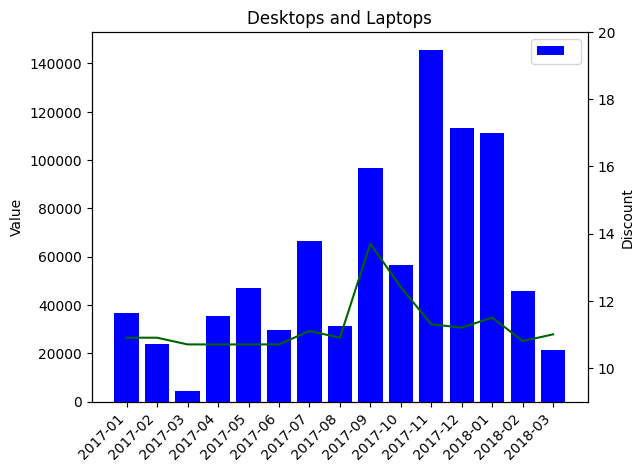

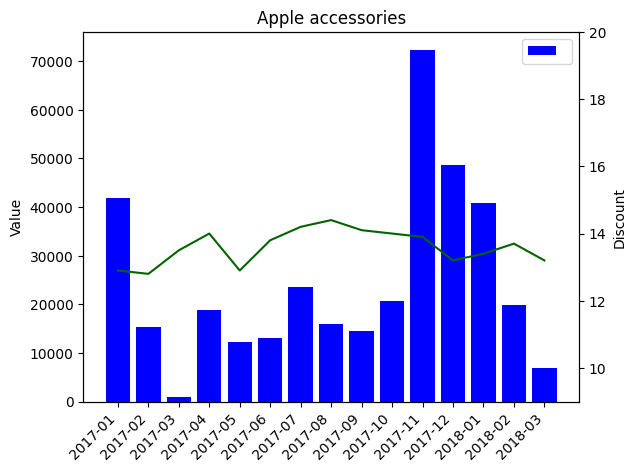

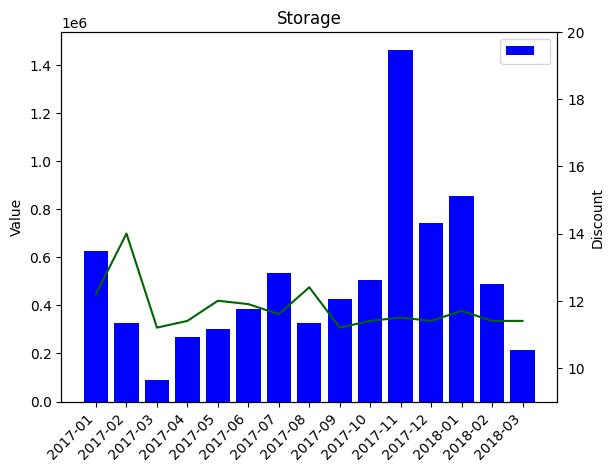

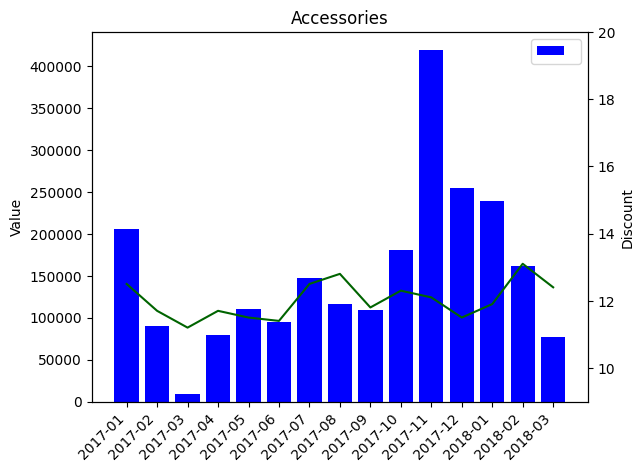

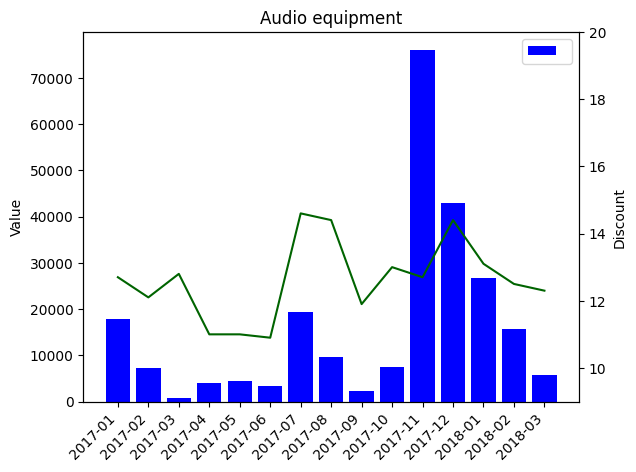

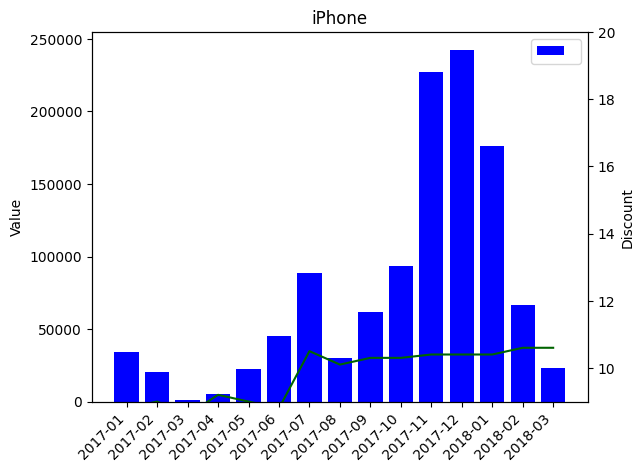

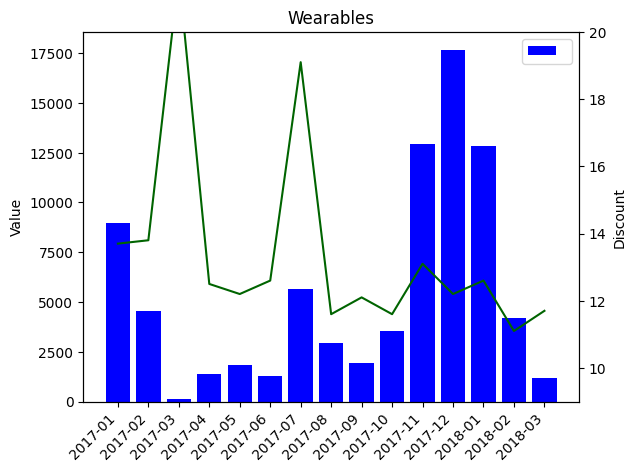

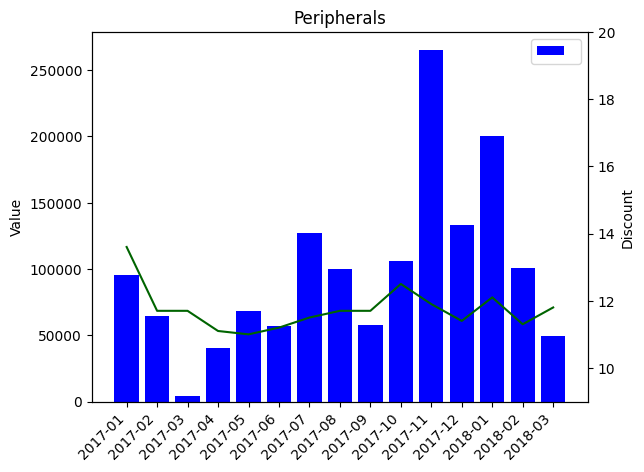

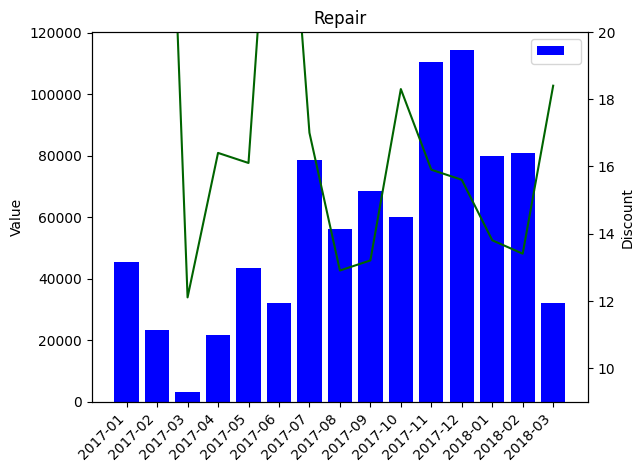

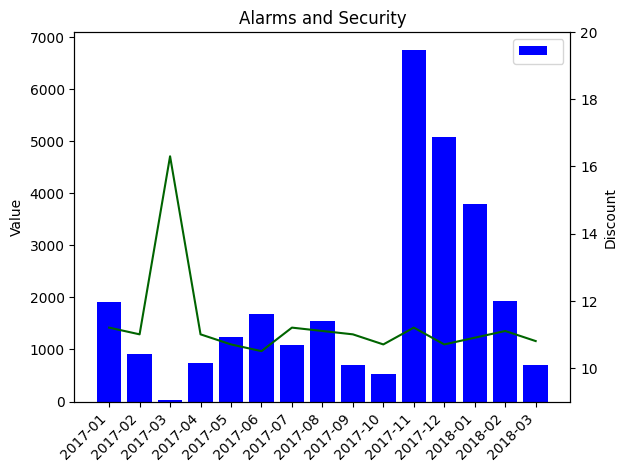

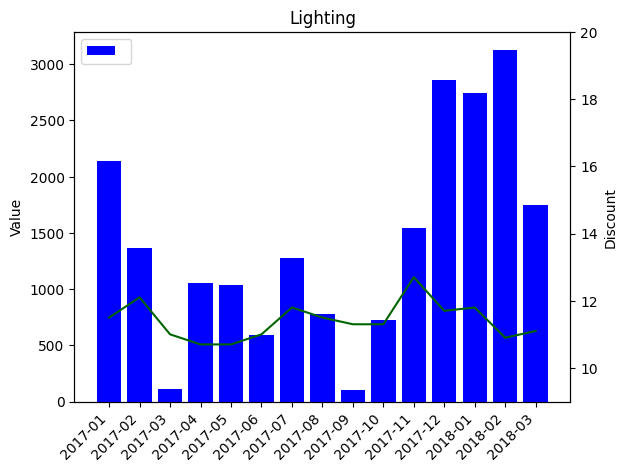

In [99]:
categories = ['Desktops and Laptops', 'Apple accessories', 'Storage', 'Accessories', 'Audio equipment', 'iPhone', 'Wearables', 'Peripherals', 'Repair', 'Alarms and Security', 'Lighting']

for category in categories:
    category_grouped = completed[completed["broad_category"] == category]

    fig, ax = plt.subplots()

    ax.bar(category_grouped["year_month"], category_grouped["value"], color="blue")
    ax.set_ylabel("Value")

    ax2 = ax.twinx()
    ax2.plot(category_grouped["year_month"], category_grouped["discount"], color="darkgreen")
    ax2.set_ylabel("Discount")

    # plt.xticks(rotation=90)
    ax2.set_ylim(9,20)
    # # Set the x-axis tick label rotation and spacing
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

    plt.title(category)
    
    # make legend visible
    ax.legend([""])
    
    plt.show()

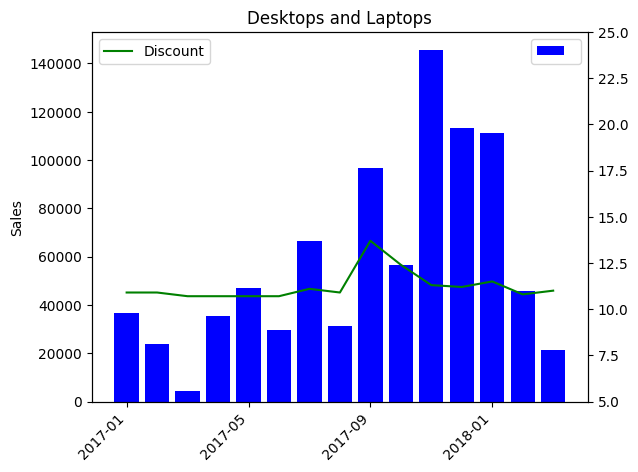

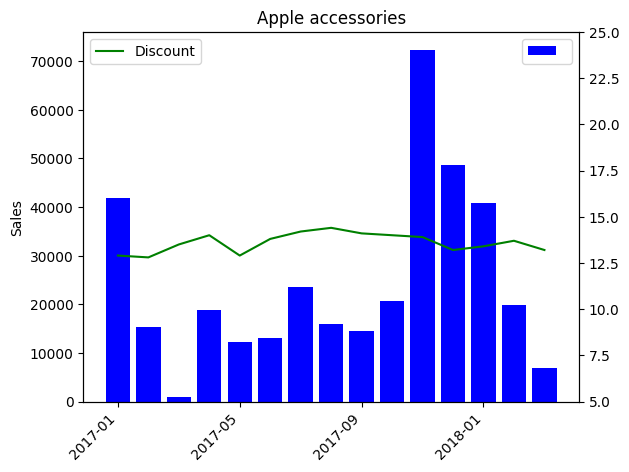

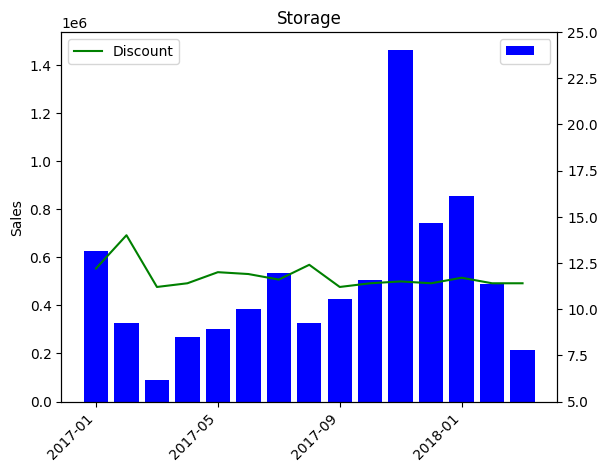

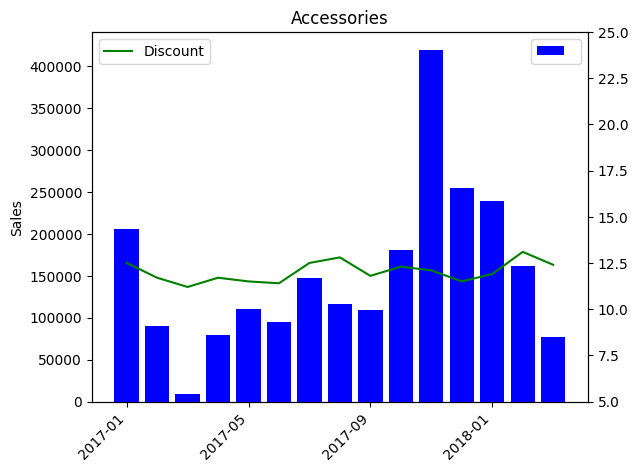

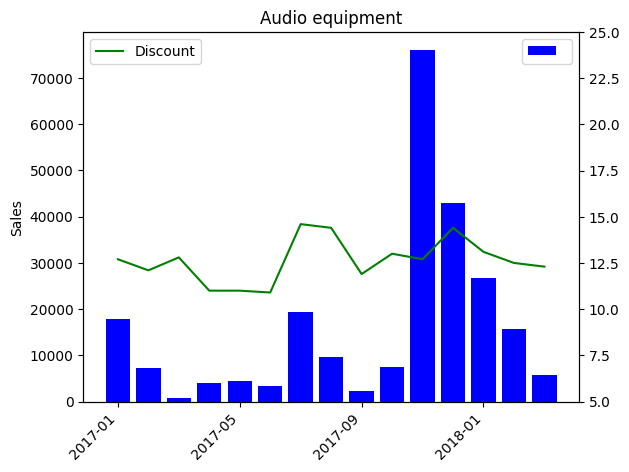

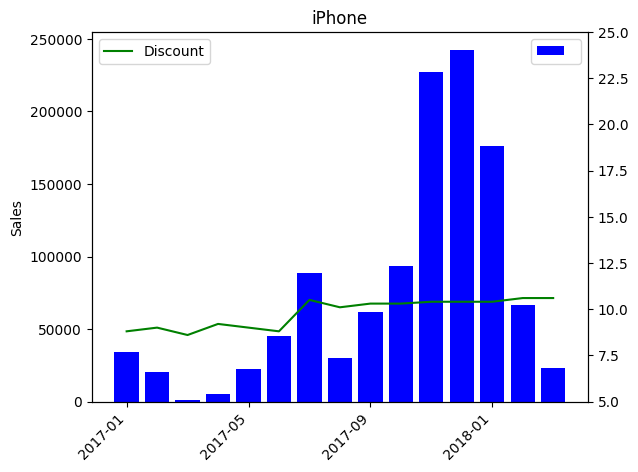

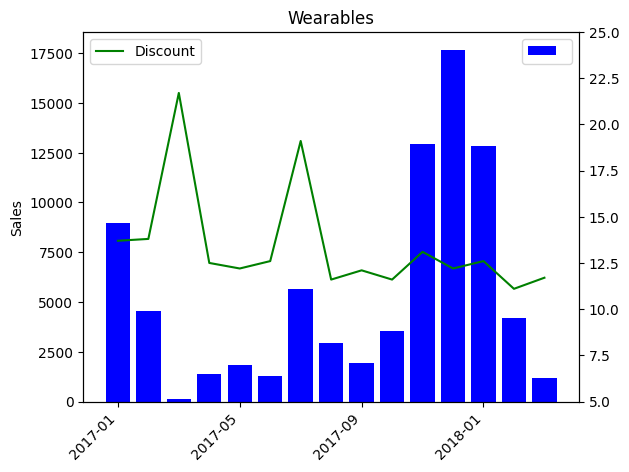

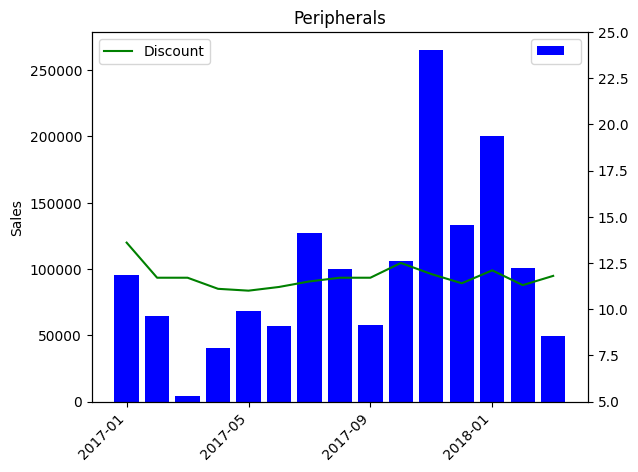

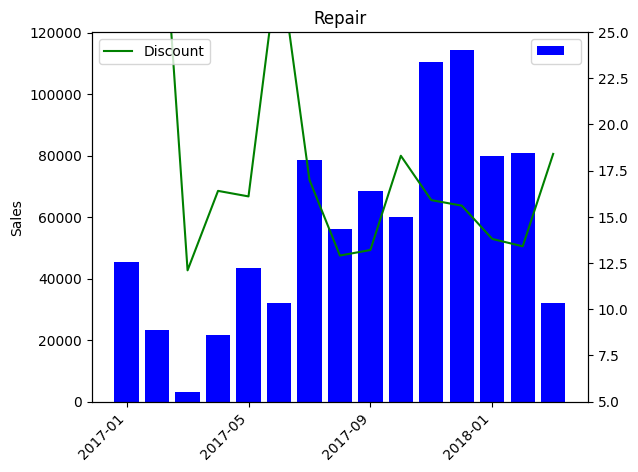

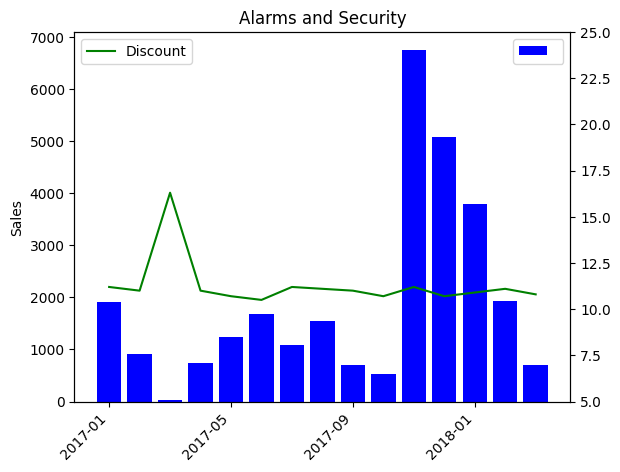

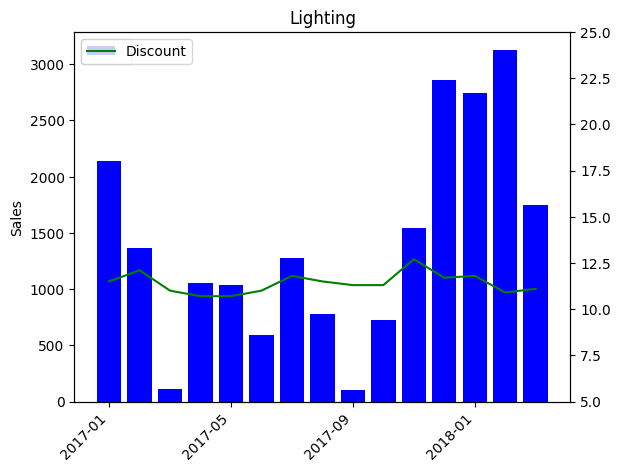

In [100]:
categories = ['Desktops and Laptops', 'Apple accessories', 'Storage', 'Accessories', 'Audio equipment', 'iPhone', 'Wearables', 'Peripherals', 'Repair', 'Alarms and Security', 'Lighting']

for category in categories:
    # filter data by category
    category_grouped = completed[completed["broad_category"] == category]

    # create a new figure and axis
    fig, ax = plt.subplots()

    # plot bars
    ax.bar(category_grouped["year_month"], category_grouped["value"], color="blue")
    
    # set y-axis label for bars
    ax.set_ylabel("Sales")

    # create a new y-axis on the right side of the plot
    ax2 = ax.twinx()
    
    # plot line
    ax2.plot(category_grouped["year_month"], category_grouped["discount"], color="green")
    
    # set color of discount label
    # ax2.yaxis.label.set_color('red')
    
    # add legend to line plot
    ax2.legend(["Discount"], loc=2)
    ax.legend(["Revenue"], loc=1)


    # set y-axis limits for line plot
    ax2.set_ylim(5,25)
    
    # Set the x-axis tick label rotation and spacing
    # ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

    # set x-axis tick labels to every 4th year_month value
    step = 4
    x_ticks = np.arange(0, len(category_grouped), step)
    ax.set_xticks(x_ticks)
    ax.set_xticklabels(category_grouped.iloc[x_ticks]['year_month'], rotation=45, ha='right')

    # set title of plot
    plt.title(category)
    
    # make legend visible
    ax.legend([""])
    
    # show plot
    plt.show()

# completPendPlaced 
completPendPlaced dataframe contains all the orderlines grouped which are pending completed or placed

``



In [ ]:
completPendPlaced = grouped4[grouped4['state'].isin(['Completed', 'Pending', 'Place Order'])].reset_index()
completPendPlaced

,index,sku,unit_price,state,broad_category,year_month,sold,baseprice,value,sale,sale%,theoreticalvalue
0,46740,KIN0137,7.49,Place Order,Storage,2017-04,801,8.99,5999.49,1.50,12.0,7201.0
1,8101,APP1190,51.00,Completed,Apple accessories,2017-11,303,70.00,15453.00,19.00,13.7,21210.0
2,4965,APP0698,9.99,Completed,Accessories,2017-01,201,25.00,2007.99,15.01,25.0,5025.0
3,103656,ZAG0032,29.99,Completed,Peripherals,2018-01,171,99.99,5128.29,70.00,33.3,17098.0
4,55065,MAC0144,24.99,Completed,Accessories,2018-03,168,39.95,4198.32,14.96,16.0,6712.0
...,...,...,...,...,...,...,...,...,...,...,...,...
55867,60552,NTE0058,11.04,Pending,Apple accessories,2017-11,1,60.99,11.04,49.95,55.2,61.0
55868,60554,NTE0058,12.99,Completed,Apple accessories,2017-12,1,60.99,12.99,48.00,47.0,61.0
55869,25605,APP2552,43.00,Place Order,Apple accessories,2018-03,1,45.00,43.00,2.00,10.5,45.0
55870,25604,APP2552,43.00,Place Order,Apple accessories,2018-02,1,45.00,43.00,2.00,10.5,45.0


In [ ]:
pivot = pd.pivot_table(completPendPlaced, values='value', index='broad_category', columns='state', aggfunc='sum')
pivot

state,Completed,Pending,Place Order
broad_category,,,
Accessories,2292679.81,625984.79,1367493.45
Alarms and Security,28615.81,8807.15,14636.00
Apple accessories,365314.20,97138.52,213000.82
Audio equipment,243534.90,60751.46,124478.30
Desktops and Laptops,865032.71,223925.11,1103427.17
Lighting,21206.78,8944.81,13493.02
Peripherals,1469583.88,429620.85,1437229.62
Repair,849674.56,277876.41,173153.24
Storage,7546890.14,2442239.15,9066037.83


In [ ]:
base2 = (completPendPlaced
           .groupby(['broad_category'])
           .agg({'value':'sum' })
           .reset_index()
           .sort_values(('value'),ascending=False)
          )

base2

,broad_category,value
8,Storage,19055167.12
0,Accessories,4286158.05
10,iPhone,4133811.03
6,Peripherals,3336434.35
4,Desktops and Laptops,2192384.99
7,Repair,1300704.21
2,Apple accessories,675453.54
3,Audio equipment,428764.66
9,Wearables,142380.26
1,Alarms and Security,52058.96


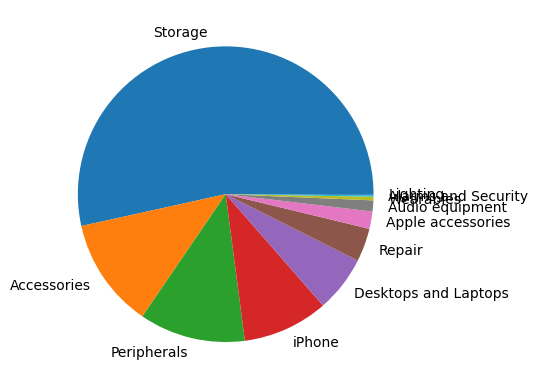

In [ ]:
plt.pie(base2['value'], labels=base['broad_category'])
plt.show()

In [ ]:
completPendPlaced = completPendPlaced.groupby(['broad_category', 'year_month']).agg({'value': 'sum', 'sold': 'sum', 'theoreticalvalue': 'sum'}).reset_index()
completPendPlaced['discount'] = round((completPendPlaced['theoreticalvalue'] / completPendPlaced['value'] *10),1)
completPendPlaced

,broad_category,year_month,value,sold,theoreticalvalue,discount
0,Accessories,2017-01,322486.36,4355,399786.0,12.4
1,Accessories,2017-02,228965.87,2442,272350.0,11.9
2,Accessories,2017-03,202499.76,1797,233794.0,11.5
3,Accessories,2017-04,210511.45,1914,245066.0,11.6
4,Accessories,2017-05,214845.16,1987,246015.0,11.5
...,...,...,...,...,...,...
160,iPhone,2017-11,693208.03,856,721300.0,10.4
161,iPhone,2017-12,732923.22,861,760930.0,10.4
162,iPhone,2018-01,501429.64,595,519681.0,10.4
163,iPhone,2018-02,390513.19,423,407051.0,10.4


<ipython-input-41-7884f053002e>:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


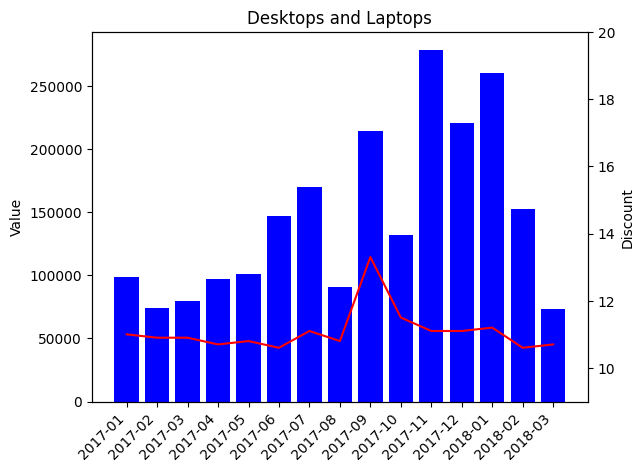

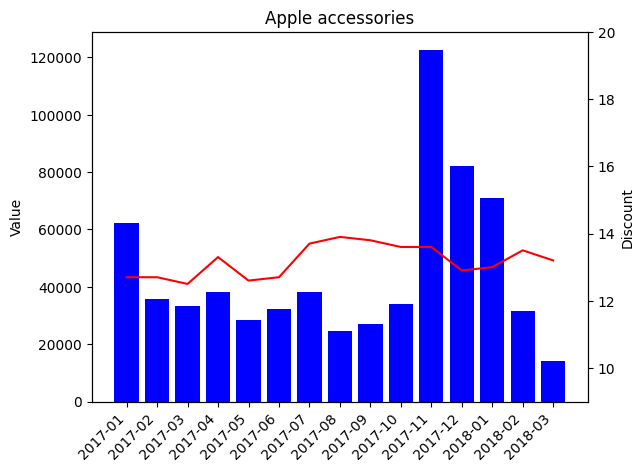

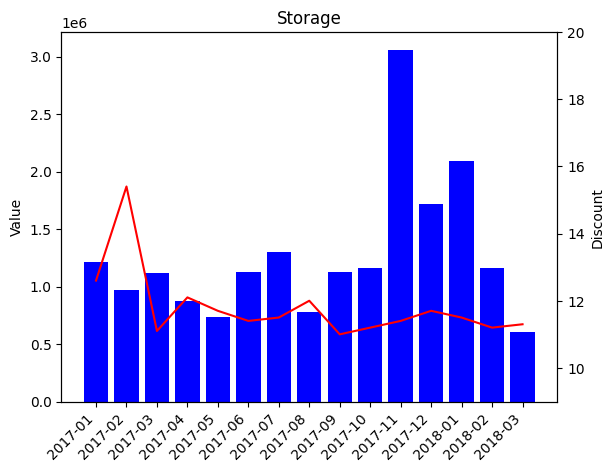

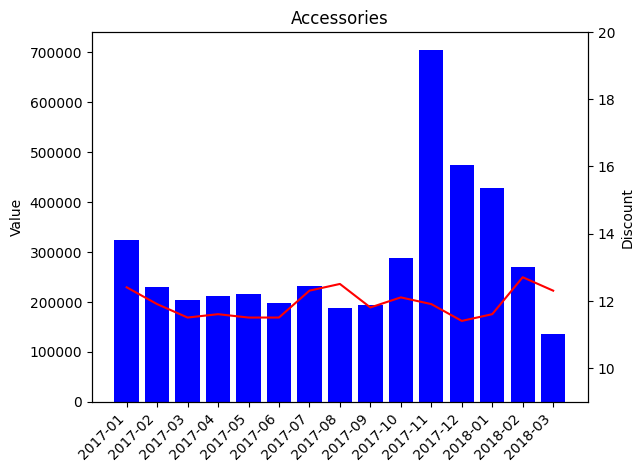

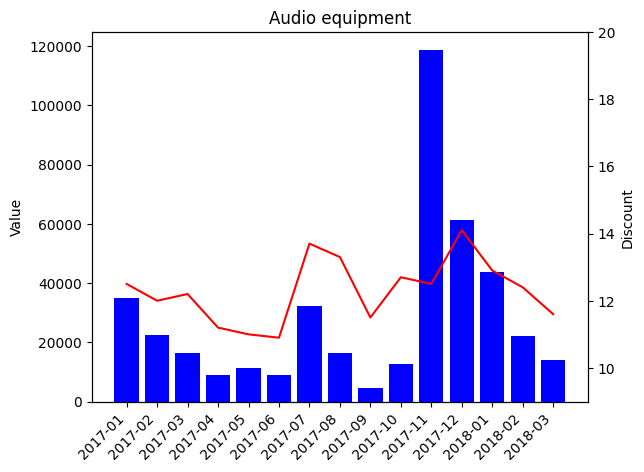

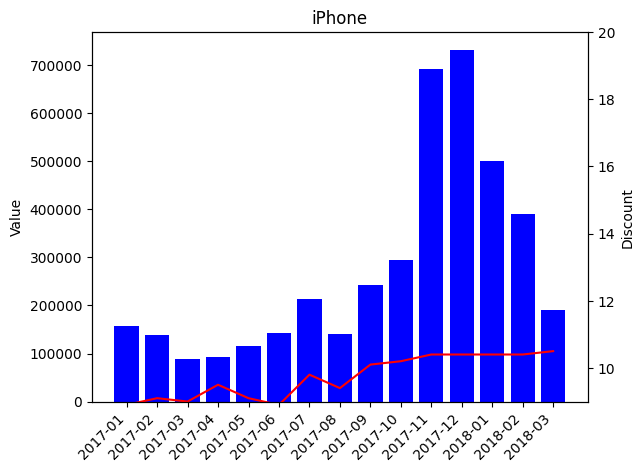

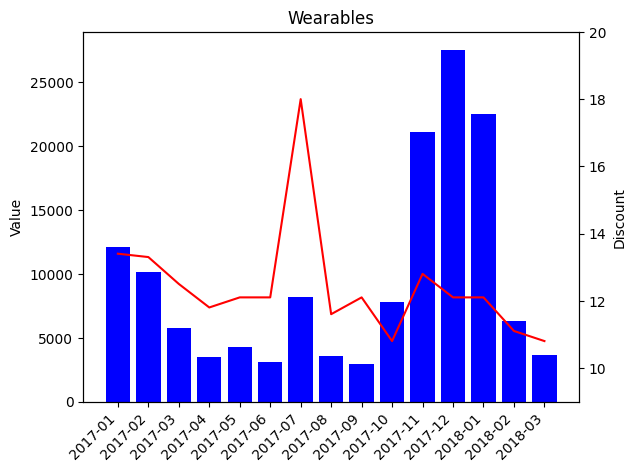

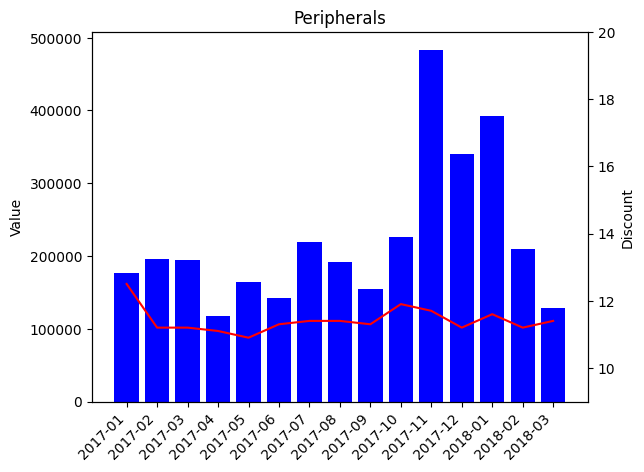

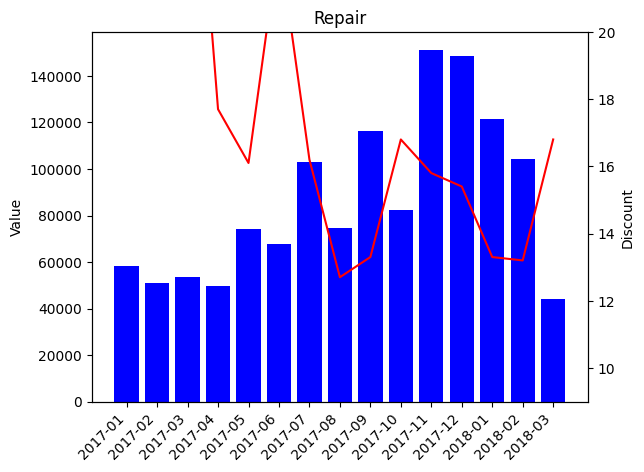

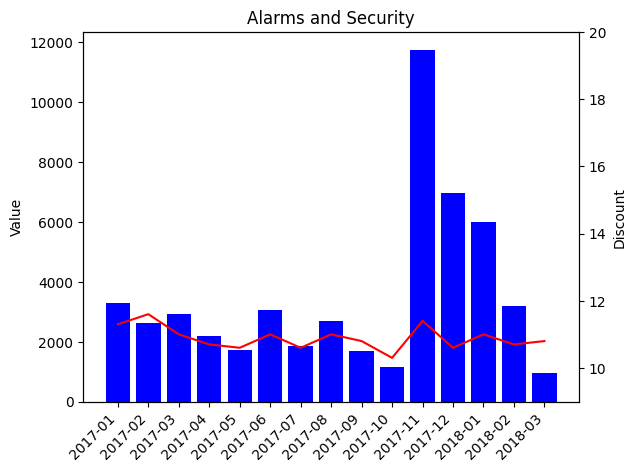

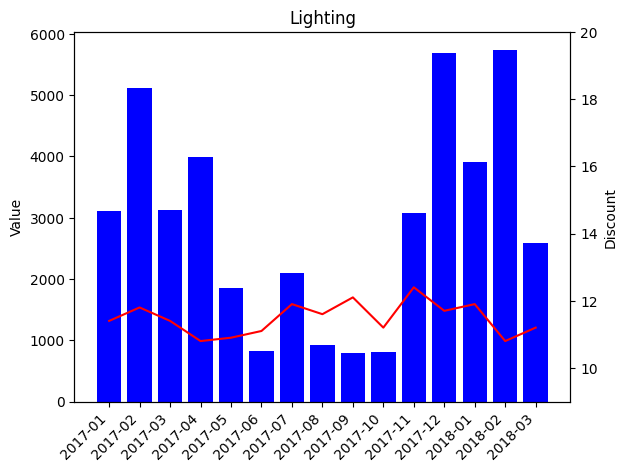

In [ ]:
categories = ['Desktops and Laptops', 'Apple accessories', 'Storage', 'Accessories', 'Audio equipment', 'iPhone', 'Wearables', 'Peripherals', 'Repair', 'Alarms and Security', 'Lighting']

for category in categories:
    category_grouped = completPendPlaced[completPendPlaced["broad_category"] == category]

    fig, ax = plt.subplots()

    ax.bar(category_grouped["year_month"], category_grouped["value"], color="blue")
    ax.set_ylabel("Value")

    ax2 = ax.twinx()
    ax2.plot(category_grouped["year_month"], category_grouped["discount"], color="red")
    ax2.set_ylabel("Discount")

    # plt.xticks(rotation=90)
    ax2.set_ylim(9,20)
    # # Set the x-axis tick label rotation and spacing
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

    plt.title(category)
    plt.show()